# __2. Customer Segmentation__

The goal of this section is to identify different customer archetypes and patterns in the data. I would like to determine or group different customers together that share certain features with each other. Different from the other models that I will use in this project, here I will exclusively use unsupervised learning models like K-means. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [23]:
df = pd.read_pickle("df.pkl")

***

## 2.1 K-Means

***

<br>



### 2.1.1 Elbow Method

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [24]:
# One hot-encoded dataframe
df_ohe = pd.get_dummies(df)

# Scale dataframe
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ohe)

/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


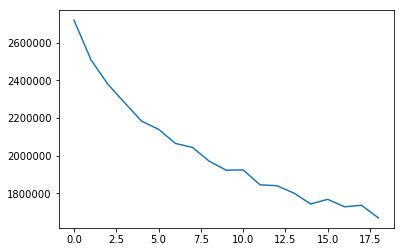

In [11]:
# Elbow method
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)
    
    
plt.plot(scores_1)
plt.show()

Visually it is difficult ot tell how to optimize the cluster number, but it seems like 3 to 4 clusters should be a good place to start. 

### 2.1.2 K-Means with optimized clusters number

In [12]:
kmeans_pipe = Pipeline ([
    ("scaler",StandardScaler()),
    #("enc", OneHotEncoder()), gives errors, not sure why -> used pandas' get_dummies instead 
    ("kmeans", KMeans(n_clusters=13))
])

In [13]:
clusters = kmeans_pipe.fit_predict(df_ohe)
labels = pd.DataFrame(clusters)
df_clusters = pd.concat([df,labels],axis=1)
df_clusters = df_clusters.rename(columns={0:'cluster'})
df_clusters.head(5)

/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,senior_client,contacted_before,cluster
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,1
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,10
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4


In [14]:
kmeans.cluster_centers_.shape

(19, 66)

### 2.1.3 Use PCA to visualize

In [15]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

principal_comp

array([[-1.96612321,  2.58992974],
       [-2.42830857,  2.24338671],
       [-1.74894572,  0.40828723],
       ...,
       [ 1.8182924 ,  0.53912806],
       [ 1.74894826, -0.5517476 ],
       [ 5.61977289,  6.13992947]])

In [16]:
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df.head(5)

,pca1,pca2
0,-1.966123,2.589930
1,-2.428309,2.243387
2,-1.748946,0.408287
3,-1.889855,0.915356
4,-1.855543,1.149542


In [17]:
pca_df = pd.concat([pca_df, labels], axis = 1)
pca_df = pca_df.rename(columns={0:'cluster'})
pca_df.head(5)

,pca1,pca2,cluster
0,-1.966123,2.589930,1
1,-2.428309,2.243387,4
2,-1.748946,0.408287,4
3,-1.889855,0.915356,10
4,-1.855543,1.149542,4


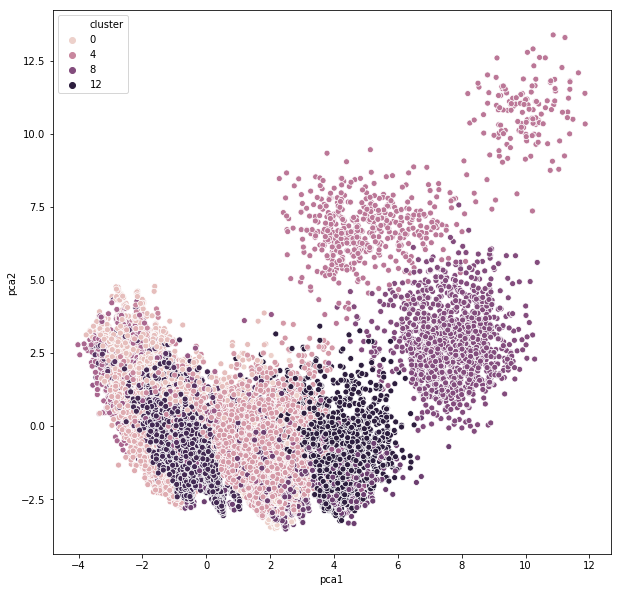

In [18]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data = pca_df)

Doesn't seem to cluster it very well. 

### 2.1.4 Try K-Means with numerical values-only

In [27]:
# Select only the numerical features
df_float=df.select_dtypes(exclude=['object']).copy()

In [28]:
# Scale dataframe
scaler = StandardScaler()
df_float_scaled = scaler.fit_transform(df_float)

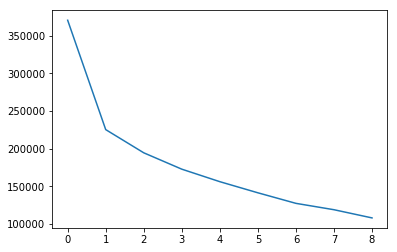

In [29]:
# Elbow method

scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_float_scaled)
    scores_1.append(kmeans.inertia_)
    
    
plt.plot(scores_1)
plt.show()

Interesting that the after the first cluster the percent of variance explained doesn't improve signifincantly.

In [30]:
kmeans_pipe = Pipeline ([
    ("scaler",StandardScaler()),
    ("kmeans", KMeans(n_clusters=6))
])

In [31]:
clusters = kmeans_pipe.fit_predict(df_float_scaled)
labels = pd.DataFrame(clusters)
df_clusters = pd.concat([df,labels],axis=1)
df_clusters = df_clusters.rename(columns={0:'cluster'})
df_clusters.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,senior_client,contacted_before,cluster
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,1
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,1
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0,no,no,4


In [32]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

principal_comp

array([[-1.96613293,  2.59475387],
       [-2.42818975,  2.24080791],
       [-1.74891665,  0.41781585],
       ...,
       [ 1.81822453,  0.54612454],
       [ 1.74896264, -0.53581648],
       [ 5.61954971,  6.15607192]])

In [33]:
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df.head(5)

,pca1,pca2
0,-1.966133,2.594754
1,-2.428190,2.240808
2,-1.748917,0.417816
3,-1.889826,0.934015
4,-1.855500,1.141888


In [34]:
pca_df = pd.concat([pca_df, labels], axis = 1)
pca_df = pca_df.rename(columns={0:'cluster'})
pca_df.head(5)

,pca1,pca2,cluster
0,-1.966133,2.594754,4
1,-2.428190,2.240808,4
2,-1.748917,0.417816,1
3,-1.889826,0.934015,1
4,-1.855500,1.141888,4


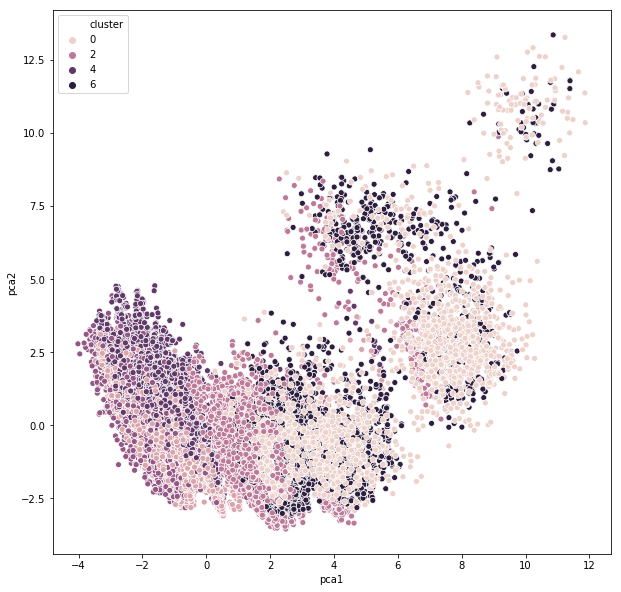

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data = pca_df)

***

## 2.2 Mean-shift Clustering


***

In [47]:
from sklearn.cluster import MeanShift

# One hot-encoded dataframe
df_ohe = pd.get_dummies(df)

# Scale dataframe
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ohe)

/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
from sklearn.cluster import estimate_bandwidth
# Estimate the bandwith 
estimated_bw = estimate_bandwidth(df_ohe,quantile=0.3, n_samples=None, random_state=0, n_jobs=None)

In [50]:
estimated_bw

48.249104390782556

In [58]:
# Define estimator
meanshift = MeanShift(bandwidth=estimated_bw)

In [ ]:
meanshift.fit(df_scaled)

In [18]:
labels = meanshift.labels_

In [21]:
labels.shape

(41188,)

***

## 2.3 Summary

***